In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [7]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])


In [9]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [10]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
# X => (X - Xmin)/(Xmax-Xmin) = X/255
#normalization
X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [15]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [17]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [18]:
model=Sequential()

model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.3512 - accuracy: 0.9030 - val_loss: 0.3324 - val_accuracy: 0.9093
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3485 - accuracy: 0.9034 - val_loss: 0.3298 - val_accuracy: 0.9104
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3459 - accuracy: 0.9042 - val_loss: 0.3278 - val_accuracy: 0.9103
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3436 - accuracy: 0.9046 - val_loss: 0.3257 - val_accuracy: 0.9111
Epoch 5/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.3413 - accuracy: 0.9054 - val_loss: 0.3238 - val_accuracy: 0.9120
Epoch 6/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.3392 - accuracy: 0.9058 - val_loss: 0.3220 - val_accuracy: 0.9119
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step 

In [29]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.30509893894195556
Test accuracy: 0.9157000184059143


In [30]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 2.2740 - accuracy: 0.2073 - val_loss: 2.2242 - val_accuracy: 0.2459
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 2.1795 - accuracy: 0.4478 - val_loss: 2.1229 - val_accuracy: 0.5299
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 2.0604 - accuracy: 0.5829 - val_loss: 1.9767 - val_accuracy: 0.6926
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 1.8901 - accuracy: 0.6608 - val_loss: 1.7750 - val_accuracy: 0.6598
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 1.6693 - accuracy: 0.6997 - val_loss: 1.5363 - val_accuracy: 0.6985
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.4346 - accuracy: 0.7308 - val_loss: 1.3070 - val_accuracy: 0.7629
Epoch 7/20
60000/60000 [==============================] - 3s 44us/st

Test score: 0.4549542363882065
Test accuracy: 0.879800021648407


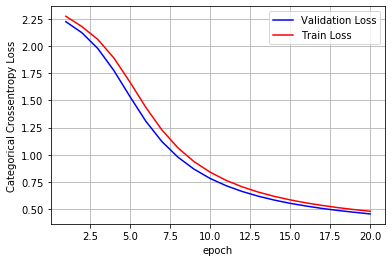

In [32]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [33]:
w_after = model_sigmoid.get_weights()
print(w_after)

[array([[-0.04188778,  0.06492178,  0.03481299, ..., -0.05531162,
         0.01176345,  0.05899863],
       [ 0.05700713,  0.0101068 ,  0.04268908, ...,  0.02476767,
        -0.0396435 , -0.05631358],
       [-0.04965842, -0.01518022, -0.06394722, ..., -0.05358589,
         0.05440786,  0.03332383],
       ...,
       [-0.04890249, -0.01314173, -0.06527316, ...,  0.00462505,
        -0.03102874,  0.06730598],
       [-0.01095265, -0.03860639, -0.06525486, ...,  0.00307728,
         0.04905628, -0.05297097],
       [ 0.01977882, -0.04379994,  0.05353012, ...,  0.06431136,
         0.04076011,  0.02227404]], dtype=float32), array([ 3.90296103e-03, -6.24549109e-03, -4.89490572e-03, -5.90701215e-03,
        5.09114889e-03, -3.56924534e-03,  1.03766164e-02,  9.60872788e-03,
       -9.10819508e-03, -1.08934734e-02, -1.16700390e-02, -1.00230775e-03,
        8.16113374e-04,  1.25705177e-04,  6.85915817e-03,  5.36682084e-04,
       -6.09627052e-04, -1.33465929e-02, -9.10114264e-04, -1.54805491e

In [34]:
model_sigmoid_adam=Sequential()
model_sigmoid_adam.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))
model_sigmoid_adam.add(Dense(128,activation='sigmoid'))
model_sigmoid_adam.add(Dense(output_dim,activation='softmax'))

model_sigmoid_adam.summary()

model_sigmoid_adam.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


history = model_sigmoid_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.5501 - accuracy: 0.8530 - val_loss: 0.2603 - val_accuracy: 0.9249
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2227 - accuracy: 0.9356 - val_loss: 0.1902 - val_accuracy: 0.9436
Epoch 3/20
60000/60000 [==========

Test score: 0.0782935284024541
Test accuracy: 0.9801999926567078


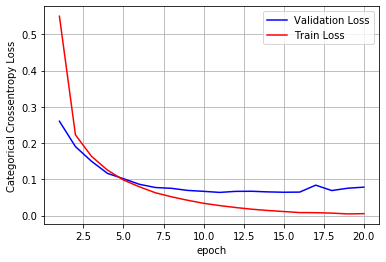

In [36]:
score = model_sigmoid_adam.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [37]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.7480 - accuracy: 0.7872 - val_loss: 0.3907 - val_accuracy: 0.8925
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3558 - accuracy: 0.8978 - val_loss: 0.2999 - val_accuracy: 0.9150
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2926 - accuracy: 0.9158 - val_loss: 0.2636 - val_accuracy: 0.9253
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2582 - accuracy: 0.9256 - val_loss: 0.2379 - val_accuracy: 0.9325
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2340 - accuracy: 0.9329 - val_loss: 0.2201 - val_accuracy: 0.9369
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2152 - accuracy: 0.9384 - val_loss: 0.2062 - val_accuracy: 0.9411
Epoch 7/20
60000/60000 [==============================] - 3s 43us/st

Test score: 0.12360273796729744
Test accuracy: 0.9623000025749207


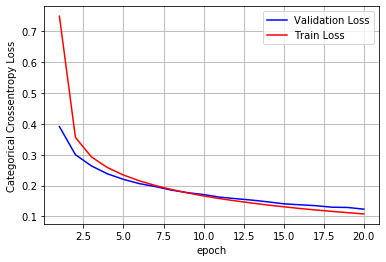

In [39]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
model_relu_adam=Sequential()
model_relu_adam.add(Dense(512,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_adam.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu_adam.add(Dense(output_dim,activation='softmax'))
print(model_relu_adam.summary())

model_relu_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2255 - accuracy: 0.9329 - val_loss: 0.1194 - val_accuracy: 0.9637
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0840 - accuracy: 0.9737 - val_loss: 0.0793 - val_accuracy: 0.9747
Epoch 3/20
60000/60000 [=====

Test score: 0.10039811728593917
Test accuracy: 0.9796000123023987


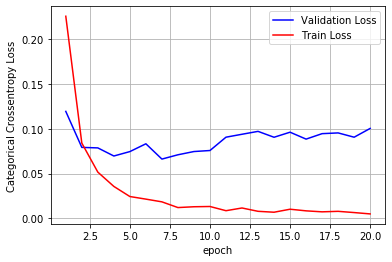

In [43]:
score = model_relu_adam.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [44]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [45]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2962 - accuracy: 0.9116 - val_loss: 0.1986 - val_accuracy: 0.9446
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.1727 - accuracy: 0.9499 - val_loss: 0.1662 - val_accuracy: 0.9494
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1384 - accuracy: 0.9588 - val_loss: 0.1455 - val_accuracy: 0.9559
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1132 - accuracy: 0.9660 - val_loss: 0.1337 - val_accuracy: 0.9600
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.1235 - val_accuracy: 0.9621
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0807 - accuracy: 0.9755 - val_loss: 0.1131 - val_accuracy: 0.9653
Epoch 7/20
60000/60000 [==============================] - 5s 84us/st

Test score: 0.10174031943001319
Test accuracy: 0.9722999930381775


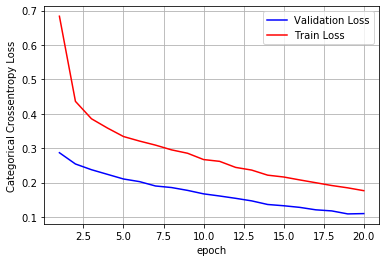

In [49]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [47]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

In [48]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.6836 - accuracy: 0.7885 - val_loss: 0.2866 - val_accuracy: 0.9154
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4360 - accuracy: 0.8676 - val_loss: 0.2539 - val_accuracy: 0.9234
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.3854 - accuracy: 0.8831 - val_loss: 0.2372 - val_accuracy: 0.9292
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3584 - accuracy: 0.8917 - val_loss: 0.2237 - val_accuracy: 0.9333
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3337 - accuracy: 0.8990 - val_loss: 0.2102 - val_accuracy: 0.9348
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3205 - accuracy: 0.9036 - val_loss: 0.2026 - val_accuracy: 0.9397
Epoch 7/20
60000/60000 [==============================] - 6s 93us/st

Test score: 0.10958204906918108
Test accuracy: 0.9689000248908997


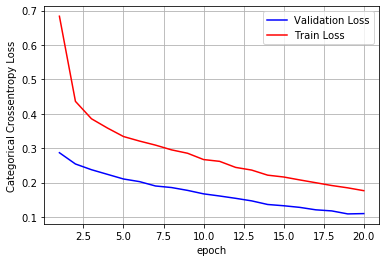

In [50]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)